In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
df = pd.read_csv('cleveland-processed.csv')
df.head()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,type
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        298 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
 14  type      303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


In [58]:
df.describe()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,type
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,298.000000,301.000000,303.000000,303.000000
mean,54.366337,0.683168,3.155116,131.623762,246.264026,0.148515,0.983498,149.646865,0.326733,1.039604,1.600660,0.674497,4.734219,0.455446,0.933993
std,9.082101,0.466011,0.958941,17.538143,51.830751,0.356198,0.994883,22.905161,0.469794,1.161075,0.616226,0.938202,1.939706,0.498835,1.229709
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,274.500000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,4.000000


In [59]:
df.columns

Index(['Age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'type'],
      dtype='object')

In [60]:
df.type.value_counts()

0    165
1     54
2     36
3     35
4     13
Name: type, dtype: int64

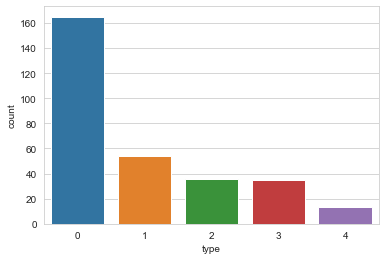

In [61]:
sns.countplot(x='type',data=df)
plt.show()

Text(0, 0.5, 'sex: 0=female; 1=male')

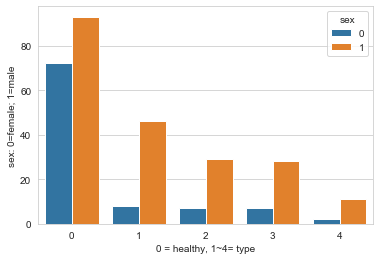

In [62]:
sns.set_style('whitegrid')
sns.countplot(x='type',hue='sex',data=df)
plt.xlabel("0 = healthy, 1~4= type")
plt.ylabel("sex: 0=female; 1=male")

Text(0.5, 0, 'Age')

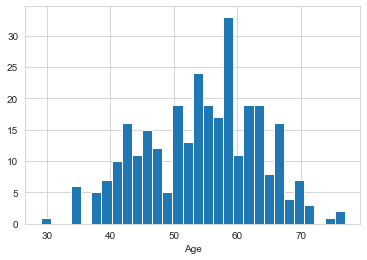

In [63]:
sns.set_style('whitegrid')

df['Age'].hist(bins=30)

plt.xlabel('Age')

Text(0.5, 0, 'chest pain type')

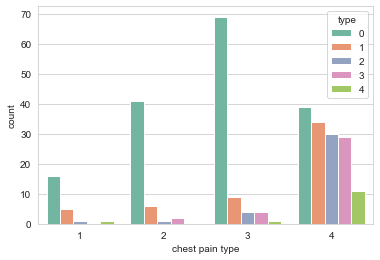

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='cp',hue='type',data=df,palette='Set2')
plt.xlabel("chest pain type")

In [65]:
sex1 = pd.get_dummies(df['sex'],drop_first=True)
cp1 = pd.get_dummies(df['cp'],drop_first=True)
fbs1 = pd.get_dummies(df['fbs'],drop_first=True)
restecg1 = pd.get_dummies(df['restecg'],drop_first=True)
exang1 = pd.get_dummies(df['exang'],drop_first=True)
slope1 = pd.get_dummies(df['slope'],drop_first=True)
ca1 = pd.get_dummies(df['ca'],drop_first=True)
thal1 = pd.get_dummies(df['thal'],drop_first=True)

In [66]:
df.drop(['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal'],axis=1,inplace=True)
df = pd.concat([df,sex1,cp1,fbs1,restecg1,exang1,slope1,cp1,thal1],axis=1)
df.head()

,Age,trestbps,chol,thalach,oldpeak,num,type,1,2,3,...,1,2,1,2,3,2,3,4,6.0,7.0
0,63,145,233,150,2.3,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,67,160,286,108,1.5,1,2,1,0,0,...,0,1,1,1,0,0,0,1,0,0
2,67,120,229,129,2.6,1,1,1,0,0,...,0,1,1,1,0,0,0,1,0,1
3,37,130,250,187,3.5,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
4,41,130,204,172,1.4,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [67]:
df.columns

Index([     'Age', 'trestbps',     'chol',  'thalach',  'oldpeak',      'num',
           'type',          1,          2,          3,          4,          1,
                1,          2,          1,          2,          3,          2,
                3,          4,        6.0,        7.0],
      dtype='object')

# LogisticRegression

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('type',axis=1), df['type'], test_size=0.25, random_state=100)
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\stigl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
predictions = lr.predict(X_test)
predictions

array([1, 0, 0, 3, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 0,
       1, 3, 2, 1, 1, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 1,
       1, 2, 0, 3, 1, 2, 4, 0, 0, 3, 0, 3, 1, 3, 0, 3, 3, 3, 1, 1, 0, 1,
       1, 3, 0, 1, 1, 2, 3, 1, 0, 0], dtype=int64)

In [81]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.svm import SVC

In [82]:
print(classification_report(y_test,predictions))
print('Accuracy score:', accuracy_score(y_test,predictions))
print('\n confusion_matrix:\n', confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        38
           1       0.21      0.40      0.28        10
           2       0.00      0.00      0.00        14
           3       0.21      0.40      0.28        10
           4       0.00      0.00      0.00         4

    accuracy                           0.47        76
   macro avg       0.26      0.31      0.27        76
weighted avg       0.49      0.47      0.47        76

Accuracy score: 0.47368421052631576

 confusion_matrix:
 [[28  4  0  5  1]
 [ 4  4  1  1  0]
 [ 0  7  0  7  0]
 [ 0  3  3  4  0]
 [ 0  1  1  2  0]]


In [83]:
SVM = SVC()
SVM.fit(X_test, y_test)
pred = SVM.predict(X_test)
print(classification_report(y_test,pred))

print(confusion_matrix(y_test,pred))

print('Accuracy score:', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.60      0.75        10
           2       0.58      1.00      0.74        14
           3       0.83      0.50      0.62        10
           4       0.00      0.00      0.00         4

    accuracy                           0.83        76
   macro avg       0.67      0.62      0.62        76
weighted avg       0.82      0.83      0.80        76

[[38  0  0  0  0]
 [ 2  6  2  0  0]
 [ 0  0 14  0  0]
 [ 0  0  5  5  0]
 [ 0  0  3  1  0]]
Accuracy score: 0.8289473684210527


C:\Users\stigl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

print('Accuracy score:', accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        38
           1       0.21      0.40      0.28        10
           2       0.00      0.00      0.00        14
           3       0.21      0.40      0.28        10
           4       0.00      0.00      0.00         4

    accuracy                           0.47        76
   macro avg       0.26      0.31      0.27        76
weighted avg       0.49      0.47      0.47        76

[[28  4  0  5  1]
 [ 4  4  1  1  0]
 [ 0  7  0  7  0]
 [ 0  3  3  4  0]
 [ 0  1  1  2  0]]
Accuracy score: 0.47368421052631576


# RFC

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [91]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [92]:
pred_rfc[:10]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [93]:
print(classification_report(y_test,pred))

print(confusion_matrix(y_test,pred))

print('Accuracy score:', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.60      0.75        10
           2       0.58      1.00      0.74        14
           3       0.83      0.50      0.62        10
           4       0.00      0.00      0.00         4

    accuracy                           0.83        76
   macro avg       0.67      0.62      0.62        76
weighted avg       0.82      0.83      0.80        76

[[38  0  0  0  0]
 [ 2  6  2  0  0]
 [ 0  0 14  0  0]
 [ 0  0  5  5  0]
 [ 0  0  3  1  0]]
Accuracy score: 0.8289473684210527


C:\Users\stigl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
